In [9]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load data từ thư mục local (điều chỉnh đường dẫn nếu cần)
diabetes_data = pd.read_csv("../data/diabetes.csv")

# Kiểm tra data
print(diabetes_data.head(5))  # Xem 5 dòng đầu
print(diabetes_data.dtypes)   # Kiểu dữ liệu (hầu hết là int/float)
print(diabetes_data.shape)    # Kích thước (768 rows, 9 columns)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome        

In [10]:
# Thay 0 bằng NaN cho các cột không thể là 0 (Glucose, BloodPressure, SkinThickness, Insulin, BMI)
columns_to_fill = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_fill:
    diabetes_data[column] = diabetes_data[column].replace(0, np.nan)

# Fill NaN bằng mean của từng cột
diabetes_data[columns_to_fill] = diabetes_data[columns_to_fill].fillna(diabetes_data[columns_to_fill].mean())

# Kiểm tra lại missing values
print(diabetes_data.isnull().sum())  # Đảm bảo không còn NaN

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:
# Tính trên cột 'Glucose'
column = 'Glucose'

# Mean (giá trị trung bình)
data_mean = np.mean(diabetes_data[column])
print("Mean:", data_mean)

# Median (trung vị)
data_median = np.median(diabetes_data[column])
print("Median:", data_median)

# Mode (giá trị phổ biến nhất)
data_mode = stats.mode(diabetes_data[column], nan_policy='omit')
mode_value = data_mode.mode  # Lấy giá trị mode trực tiếp
print("Mode:", mode_value)

# Variance (phương sai)
data_variance = np.var(diabetes_data[column])
print("Variance:", data_variance)

# Standard Deviation (độ lệch chuẩn)
data_sd = np.std(diabetes_data[column])
print("Standard Deviation:", data_sd)

# Range (phạm vi: max - min)
data_max = np.max(diabetes_data[column])
data_min = np.min(diabetes_data[column])
data_range = data_max - data_min
print("Range:", data_range)

# 60th Percentile (phân vị 60%)
data_percentile = np.percentile(diabetes_data[column], 60)
print("60th Percentile:", data_percentile)

# 75th Quartile (Q3, phần tư vị 75%)
data_quartile = np.quantile(diabetes_data[column], 0.75)
print("75th Quartile:", data_quartile)

# IQR (khoảng tứ phân vị)
data_IQR = stats.iqr(diabetes_data[column])
print("IQR:", data_IQR)

Mean: 121.68676277850591
Median: 117.0
Mode: 99.0
Variance: 925.1408024792489
Standard Deviation: 30.416127341909405
Range: 155.0
60th Percentile: 125.0
75th Quartile: 140.25
IQR: 40.5


In [12]:
# Thống kê mô tả toàn bộ dataset
print(diabetes_data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.200000                  

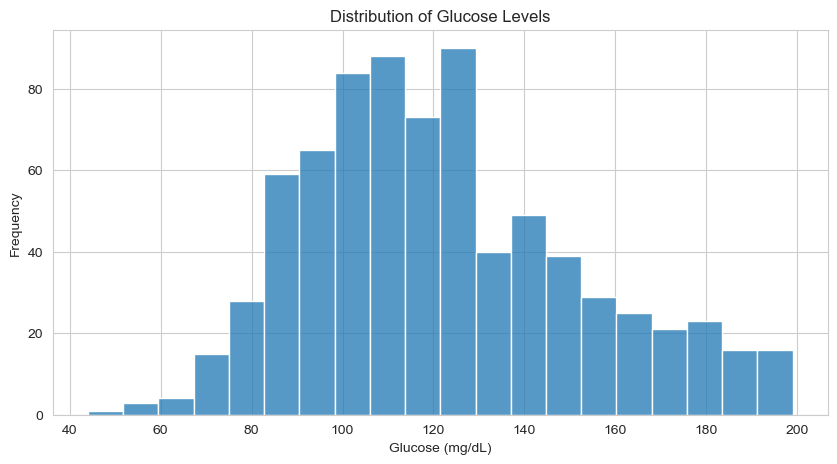

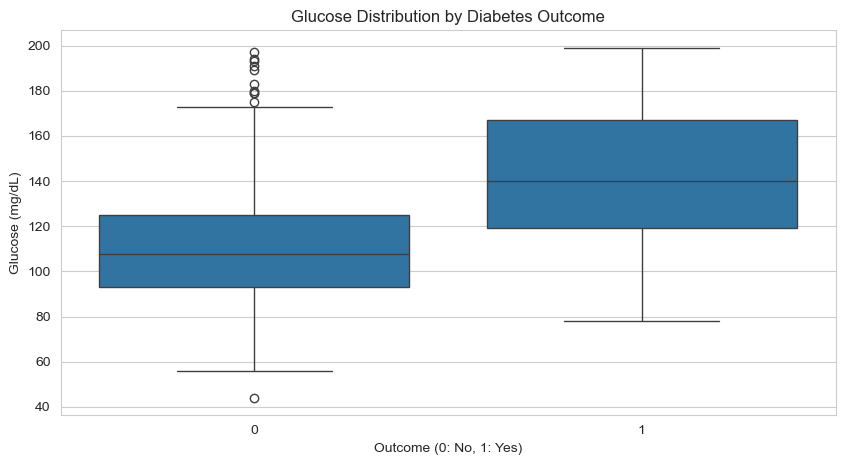

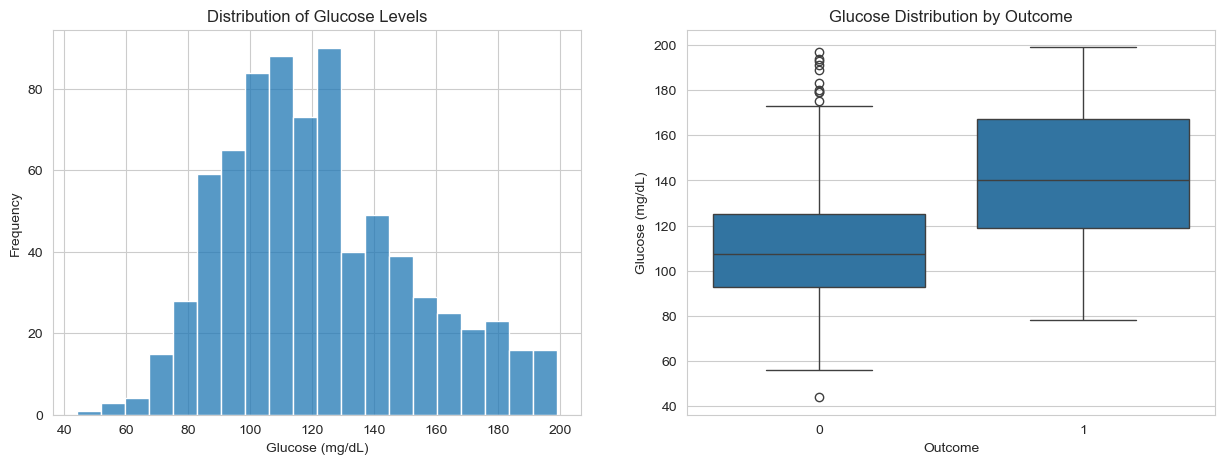

In [13]:
# Set style cho Seaborn
sns.set_style("whitegrid")

# Case 1: Histogram - Phân bố Glucose
plt.figure(figsize=(10, 5))
sns.histplot(data=diabetes_data, x='Glucose', bins=20)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose (mg/dL)')
plt.ylabel('Frequency')
plt.show()

# Case 2: Boxplot - Glucose theo Outcome
plt.figure(figsize=(10, 5))
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_data)
plt.title('Glucose Distribution by Diabetes Outcome')
plt.xlabel('Outcome (0: No, 1: Yes)')
plt.ylabel('Glucose (mg/dL)')
plt.show()

# Case 3: Hai biểu đồ song song
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=diabetes_data, x='Glucose', bins=20, ax=ax1)
ax1.set_title('Distribution of Glucose Levels')
ax1.set_xlabel('Glucose (mg/dL)')
ax1.set_ylabel('Frequency')

sns.boxplot(x='Outcome', y='Glucose', data=diabetes_data, ax=ax2)
ax2.set_title('Glucose Distribution by Outcome')
ax2.set_xlabel('Outcome')
ax2.set_ylabel('Glucose (mg/dL)')
plt.show()
